In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
combine = [train_df, test_df]

In [3]:
#train_df.head()
#train_df.isna().any()
#train_df.info()

Some features:
- type: Ticket and Cabin is mixed with alphabets and numbers
- Age, Cabin and Embarked columns contain Nan values

In [4]:
train_df.describe()
train_df.describe(include= object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


slightly amend datas for further analysis

In [5]:
for data in combine:
    data["Age"].fillna(data["Age"].mean(), inplace= True)
    data["AgeGroup"] = pd.cut(data["Age"],4)
    data["Cabin2"] = data["Cabin"].str[0]
    data.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace = True)
    data["Alone"] = 1*(train_df["SibSp"]+ train_df["Parch"] == 0)

#train_df["Age"].fillna(train_df["Age"].mean(), inplace= True)
#train_df["AgeGroup"] = pd.cut(train_df["Age"],4)
#train_df["Cabin2"] = train_df["Cabin"].str[0]
#train_df.head()


In [6]:
for col in train_df:
    if train_df[col].dtype == object:
        print(train_df[[col,"Survived"]].groupby(col, as_index = False).mean())

#print(train_df[["Alone","Survived"]].groupby(["Alone"], as_index = False).mean()) 

      Sex  Survived
0  female  0.742038
1    male  0.188908
    Cabin  Survived
0     A10       0.0
1     A14       0.0
2     A16       1.0
3     A19       0.0
4     A20       1.0
..    ...       ...
142   F33       1.0
143   F38       0.0
144    F4       1.0
145    G6       0.5
146     T       0.0

[147 rows x 2 columns]
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957
  Cabin2  Survived
0      A  0.466667
1      B  0.744681
2      C  0.593220
3      D  0.757576
4      E  0.750000
5      F  0.615385
6      G  0.500000
7      T  0.000000


Check age groupings and according survival rate. Then modify "Age" data into 3 int groups for later training.

In [7]:
train_df[['AgeGroup', 'Survived']].groupby(['AgeGroup'], as_index=False).mean().sort_values(by='AgeGroup', ascending=True)

,AgeGroup,Survived
0,"(0.34, 20.315]",0.458101
1,"(20.315, 40.21]",0.364769
2,"(40.21, 60.105]",0.390625
3,"(60.105, 80.0]",0.227273


In [8]:
for data in combine:
    data["Age"] = data["Age"].astype(int)
    
for data in combine:    
    data.loc[ data['Age'] <= 20, 'Age'] = 0
    data.loc[(data['Age'] > 20) & (data['Age'] <= 40), 'Age'] = 1
    data.loc[(data['Age'] > 40) & (data['Age'] <= 60), 'Age'] = 2
    data.loc[(data['Age'] > 60) , 'Age'] = 3

train_df.head()
"""
train_df["Age"] = train_df["Age"].astype(int)
for i in range(len(train_df.Age)):
    if train_df["Age"].loc[i].astype(int) <= 20:
        train_df["Age"].loc[i] = 0
    elif train_df["Age"].loc[i]>20 and train_df["Age"].loc[i] <=40:
        train_df["Age"].loc[i] = 1
    elif train_df["Age"].loc[i]>40 and train_df["Age"].loc[i]<=60:
        train_df["Age"].loc[i] = 2
    else:
        train_df["Age"].loc[i] = 3
train_df.head()
"""

'\ntrain_df["Age"] = train_df["Age"].astype(int)\nfor i in range(len(train_df.Age)):\n    if train_df["Age"].loc[i].astype(int) <= 20:\n        train_df["Age"].loc[i] = 0\n    elif train_df["Age"].loc[i]>20 and train_df["Age"].loc[i] <=40:\n        train_df["Age"].loc[i] = 1\n    elif train_df["Age"].loc[i]>40 and train_df["Age"].loc[i]<=60:\n        train_df["Age"].loc[i] = 2\n    else:\n        train_df["Age"].loc[i] = 3\ntrain_df.head()\n'

Plot graphs to see relationships visually.

<AxesSubplot:xlabel='Alone', ylabel='Survived'>

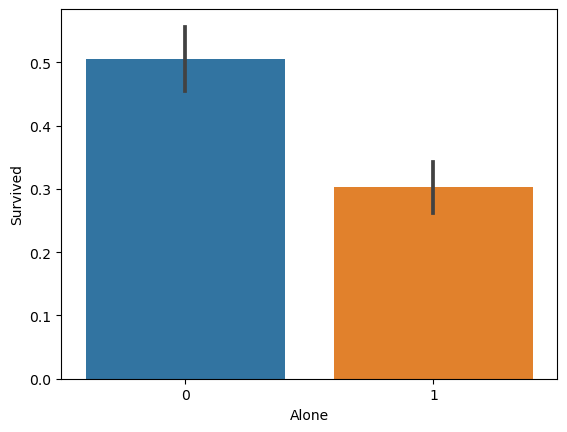

In [9]:
sns.barplot(x = "Alone", y = "Survived", data = train_df)

<AxesSubplot:xlabel='AgeGroup', ylabel='Survived'>

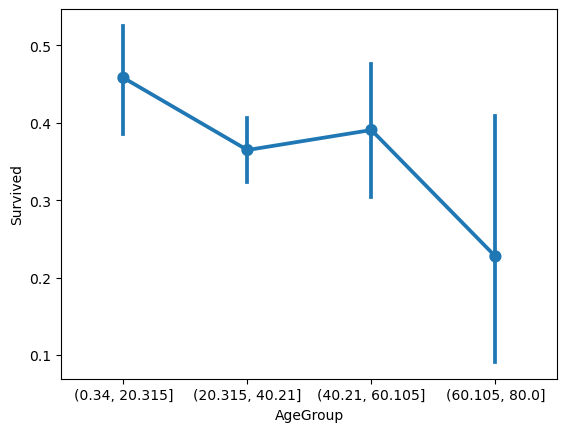

In [10]:
sns.pointplot(x = 'AgeGroup', y = 'Survived',  data=train_df)

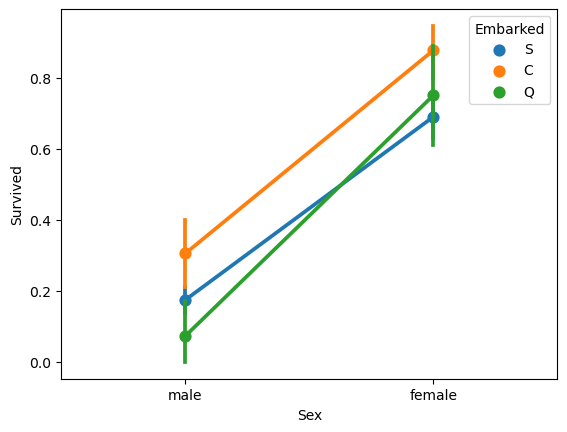

In [11]:
#train = sns.load_dataset("test_df")

sns.pointplot(
    x = "Sex",
    y = "Survived",
    hue= "Embarked",
    data = train_df
)
plt.show()

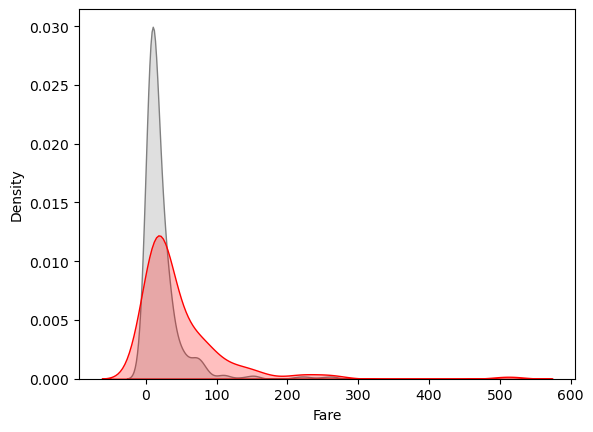

In [12]:
ax=sns.kdeplot(train_df.loc[(train_df['Survived'] == 0),'Fare'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(train_df.loc[(train_df['Survived'] == 1),'Fare'] , color='r',shade=True, label='survived')
plt.show()



In [13]:
train_df['Sex'] = train_df.Sex.apply(lambda x: 0 if x == "female" else 1)
test_df['Sex'] = test_df.Sex.apply(lambda x: 0 if x == "female" else 1)


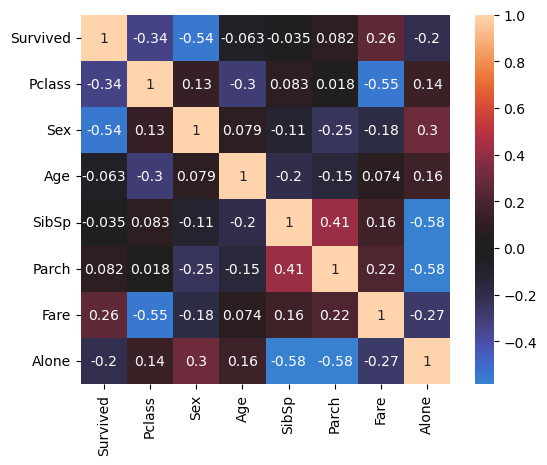

In [14]:

sns.heatmap(train_df.corr(), 
            annot=True,
            #mask = mask,
            #cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            #linewidths=.9, 
            #linecolor='white',
            fmt='.2g',
            center = 0,
            square=True)
plt.show()

In [15]:
for data in combine:
    data.drop(["SibSp", "Parch", "Fare", "AgeGroup", "Cabin", "Cabin2"], axis = 1, inplace=True)
    data["Embarked"].fillna("C", inplace= True)

print(train_df.head(), test_df.head())

   Survived  Pclass  Sex  Age Embarked  Alone
0         0       3    1    1        S      0
1         1       1    0    1        C      0
2         1       3    0    1        S      1
3         1       1    0    1        S      0
4         0       3    1    1        S      1    Pclass  Sex  Age Embarked  Alone
0       3    1    1        Q      0
1       3    0    2        S      0
2       2    1    3        Q      1
3       3    1    1        S      0
4       3    0    1        S      1


In [16]:
print(test_df.head())
print(train_df.head())

   Pclass  Sex  Age Embarked  Alone
0       3    1    1        Q      0
1       3    0    2        S      0
2       2    1    3        Q      1
3       3    1    1        S      0
4       3    0    1        S      1
   Survived  Pclass  Sex  Age Embarked  Alone
0         0       3    1    1        S      0
1         1       1    0    1        C      0
2         1       3    0    1        S      1
3         1       1    0    1        S      0
4         0       3    1    1        S      1


In [17]:
for data in combine:
    data['Embarked'] = data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Embarked,Alone
0,0,3,1,1,0,0
1,1,1,0,1,1,0
2,1,3,0,1,0,1
3,1,1,0,1,0,0
4,0,3,1,1,0,1


In [18]:
Y_train = train_df["Survived"]
X_train = train_df.drop("Survived", axis=1).copy()

X_test  = test_df.copy()


In [19]:
#X_train = train_df.drop(["AgeGroup","Embarked"], axis=1)
#X_test = X_test.drop(["AgeGroup","Embarked"], axis=1)
#X_test  = X_test.drop("AgeGroup", axis=1).copy()
print(X_train.info(), X_test.info() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Pclass    891 non-null    int64
 1   Sex       891 non-null    int64
 2   Age       891 non-null    int64
 3   Embarked  891 non-null    int64
 4   Alone     891 non-null    int64
dtypes: int64(5)
memory usage: 34.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Pclass    418 non-null    int64
 1   Sex       418 non-null    int64
 2   Age       418 non-null    int64
 3   Embarked  418 non-null    int64
 4   Alone     418 non-null    int64
dtypes: int64(5)
memory usage: 16.5 KB
None None


In [20]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
print(logreg.score(X_train, Y_train))


0.792368125701459
